# 4.0-Level 1 annotation

**Inés Sentís**

Date of execution 

In [1]:
Sys.Date()

[1] "2025-01-10"

## Introduction

Level 1 annotation of main cell types

## Libraries

In [2]:
suppressMessages(suppressWarnings({
library(Seurat)
library(here)
library(glue)
library(tidyverse)
library(ggplot2)
library(dplyr)
}))

## Parameters

In [3]:
source(here("SCGRES_99_100/sc_analysis/misc/paths.R"))
source(here("utils/bin.R"))

"{annot}/{plt_dir}" %>%
  glue::glue() %>%
  here::here() %>%
  dir.create(path = .,
           showWarnings = FALSE,
           recursive = TRUE)

"{annot}/{robj_dir}" %>%
  glue::glue() %>%
  here::here() %>%
  dir.create(path = .,
           showWarnings = FALSE,
           recursive = TRUE)

set.seed(0)

## Load data

In [4]:
# read object
seurat_obj <- readRDS(here(glue("{clust}/{robj_dir}/3.2-clustering_T0_CD3pos.rds")))

# markers
rna.markers <- read_csv(here(glue("{clust}/{robj_dir}/3.2-clustering_T0_CD3pos.csv")))

Rows: 6500 Columns: 7
── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (1): gene
dbl (6): p_val, avg_log2FC, pct.1, pct.2, p_val_adj, cluster

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


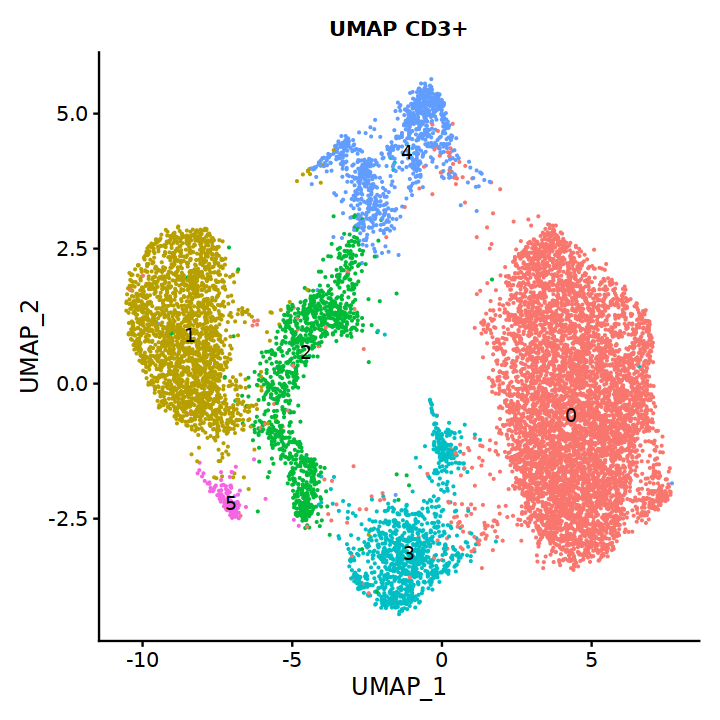

In [5]:
options(repr.plot.width = 6, repr.plot.height = 6, warn=-1,verbose = FALSE)
DimPlot(
  seurat_obj,
  reduction = "umap",
  pt.size = 0.1,
  label=T
) + NoLegend() + ggtitle(glue('UMAP CD3+')) + 
    theme(plot.title = element_text(hjust = 0.5, size = 12, face = "bold"))

### Check general cell types

Plot specific markers to annotate main cell types

#### T-cells

In [6]:
markers = c("CD3E", "CD3G","CD4","CD8A", "CD8B",
            "SELL","IL7R","CX3CR1","GZMK","FOXP3", "PDCD1")

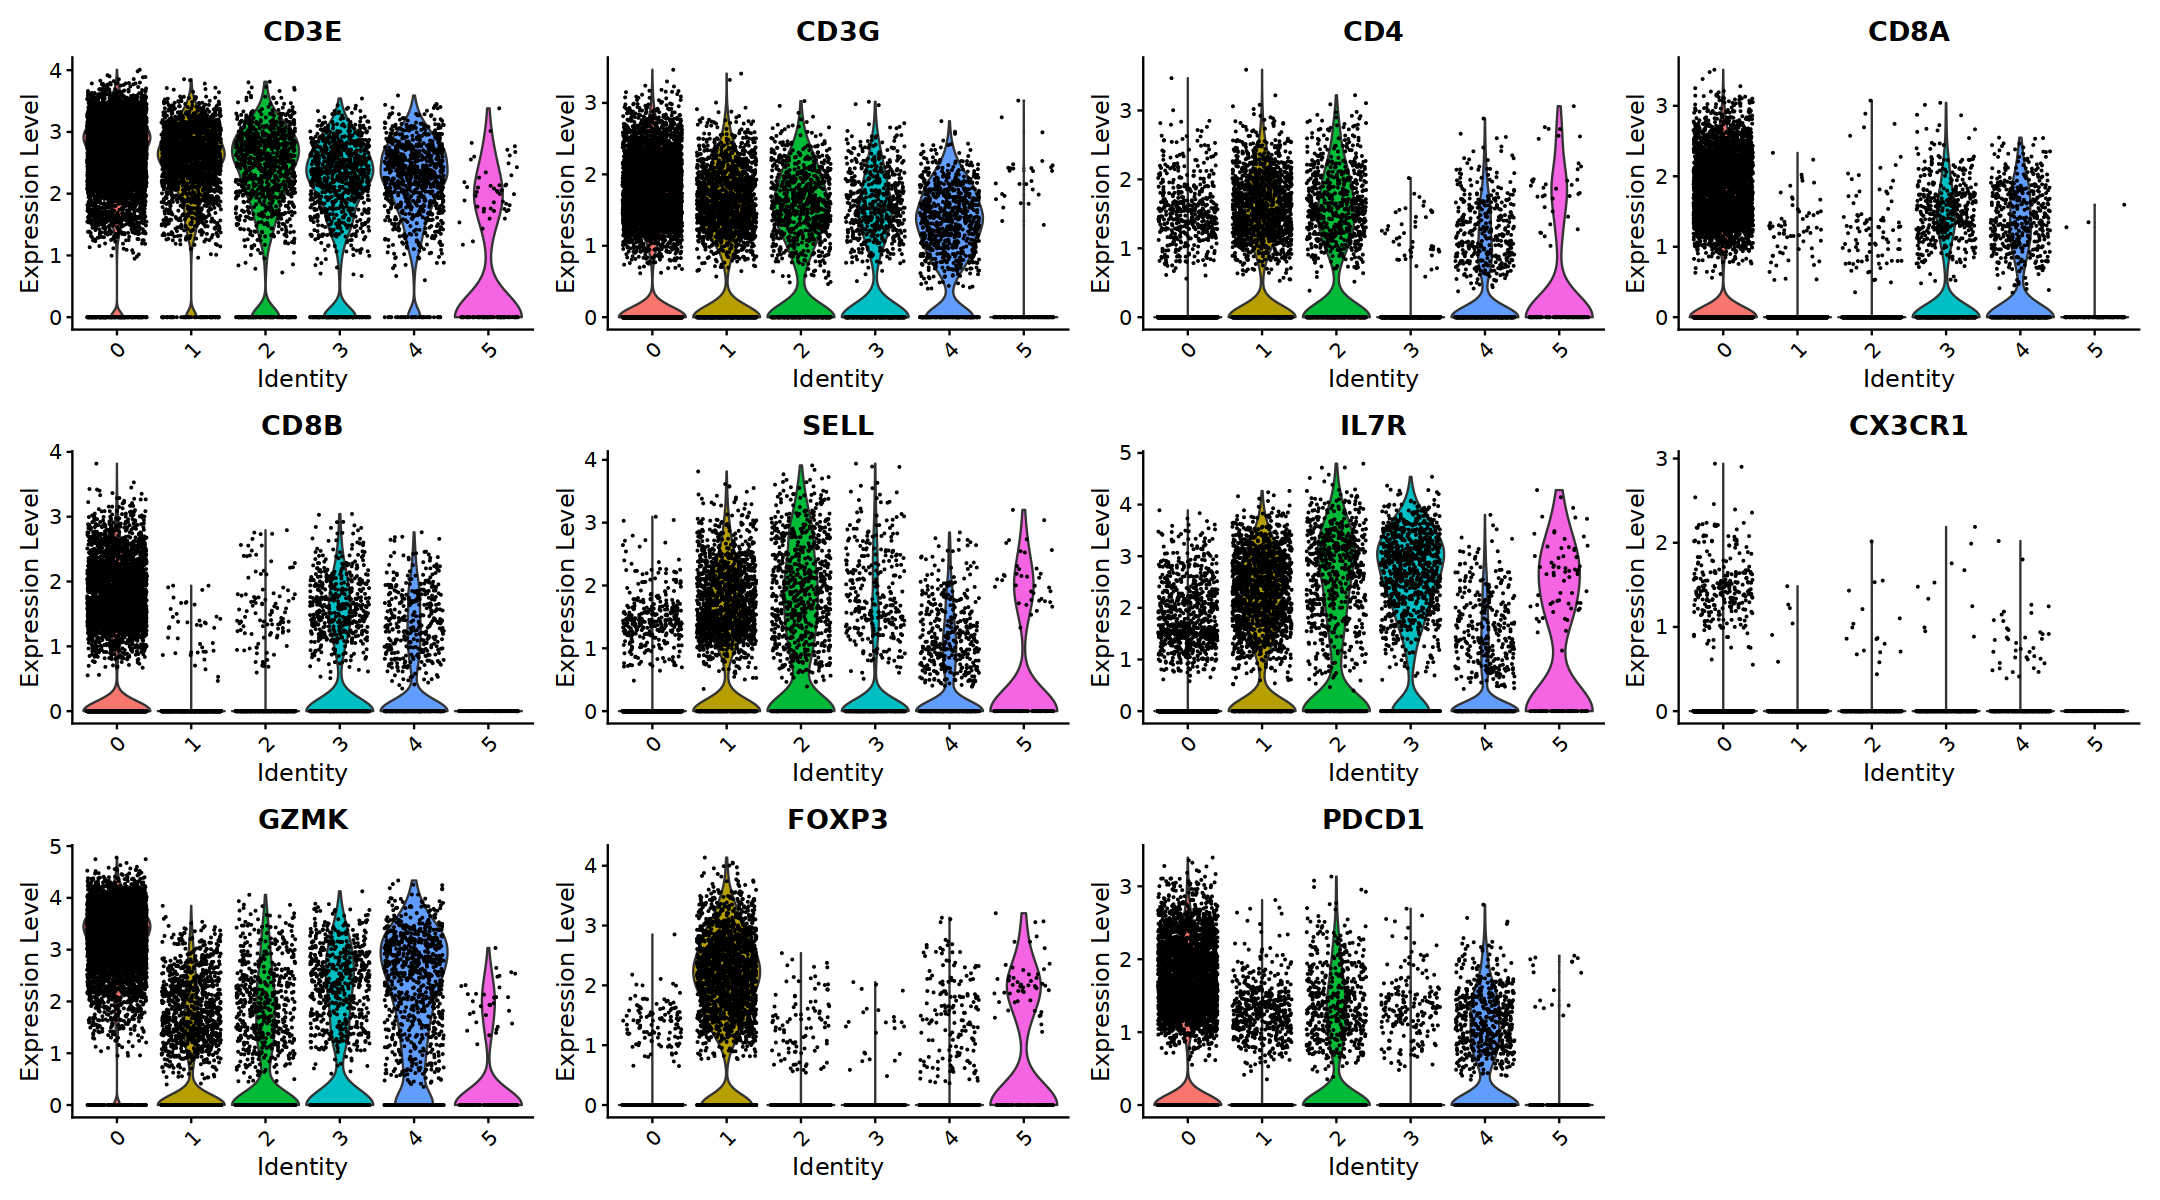

In [7]:
options(repr.plot.width = 18, repr.plot.height = 10, warn=-1,verbose = FALSE)
VlnPlot(seurat_obj,features=markers, ncol=4)

In [8]:
c <- 0
rna.markers %>% 
  dplyr::filter(cluster == c) %>% 
  dplyr::filter(p_val_adj < 0.05) %>% 
  arrange(desc(avg_log2FC)) %>% head(n=10)

p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1.202664e-256,2.537857,0.994,0.544,3.133902e-252,0,NKG7
4.506678e-251,2.318025,0.998,0.665,1.174350e-246,0,CCL5
2.200903e-126,2.139686,0.687,0.176,5.735113e-122,0,CCL4L2
2.443778e-233,2.099873,0.986,0.542,6.367996e-229,0,GZMK
5.316137e-121,2.011581,0.617,0.110,1.385279e-116,0,VCAM1
1.697166e-139,1.976049,0.866,0.319,4.422475e-135,0,CCL4
3.197396e-117,1.892161,0.582,0.129,8.331775e-113,0,FCGR3A
1.163593e-96,1.846169,0.581,0.146,3.032090e-92,0,GZMH
7.944714e-149,1.836256,0.854,0.413,2.070233e-144,0,PRF1


## Renaming

In [9]:
rename_clusters= list("0"="CD8 T-cells",
                      "1"="Tregs",
                      "2"="Naive T-cells",
                      "3"="CD8 Memory",
                      "4"="Proliferative T-cells",
                      "5"="Tregs")
seurat_obj <- RenameIdents(object = seurat_obj, rename_clusters)
seurat_obj$l1_annot <- Idents(seurat_obj)

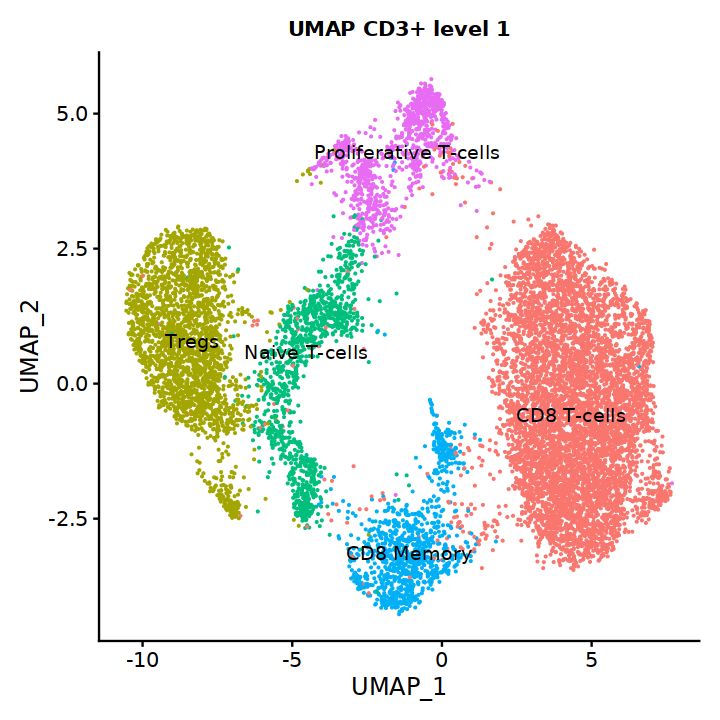

In [10]:
options(repr.plot.width = 6, repr.plot.height = 6, warn=-1,verbose = FALSE)
DimPlot(
  seurat_obj,
  reduction = "umap",
  pt.size = 0.1,
  label = T
) + NoLegend() + ggtitle(glue('UMAP CD3+ level 1')) + 
    theme(plot.title = element_text(hjust = 0.5, size = 12, face = "bold"))

## Save

In [11]:
saveRDS(seurat_obj, here::here(glue::glue("{annot}/{robj_dir}/4.0-l1_T0_CD3pos.rds")))

## Session Info

In [12]:
sessionInfo()

R version 4.1.1 (2021-08-10)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: CentOS Linux 7 (Core)

Matrix products: default
BLAS/LAPACK: /home/groups/singlecell/isentis/conda_envs/ines_r4.1.1c/lib/libopenblasp-r0.3.24.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=es_ES.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=es_ES.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=es_ES.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=es_ES.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] lubridate_1.9.3    forcats_1.0.0      stringr_1.5.0      dplyr_1.1.3       
 [5] purrr_1.0.2        readr_2.1.4        tidyr_1.3.0        tibble_3.2.1      
 [9] ggplot2_3.4.4      tidyverse_2.0.0    glue_1.6.2         here_1.0.1        
[13] SeuratObject_4.1.4 Seurat_4.0.5  